<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/KNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from random import seed
from random import random
from random import randint
from sklearn.neighbors import KNeighborsClassifier

**Set the number of neighbors to vote**

In [23]:
n_neighbors = 2 #change to 5

**Get and prepare the data**

In [24]:
from sklearn.datasets import make_classification
# Generate Balanced Data
X,y = make_classification(n_samples=2000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1,class_sep=2,
                          flip_y=0,weights=[0.33,0.33,0.33], random_state=randint(0,20))
#f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
#sns.scatterplot(Xb[:,0],Xb[:,1],hue=y,ax=ax1);
#ax1.set_title("No Imbalance");

In [25]:
X.shape

(2000, 2)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

**Do classification for both uniform and distance weights**<br>
>‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

>‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [27]:
clf_U = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
U_trained=clf_U.fit(X_train, y_train)
y_U_pred = clf_U.predict(X_test)


In [28]:
clf_D = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
D_trained =clf_D.fit(X_train, y_train)
y_D_pred = clf_D.predict(X_test)

In [29]:
print(confusion_matrix(y_test, y_U_pred))
print(classification_report(y_test, y_U_pred))

print(confusion_matrix(y_test, y_D_pred))
print(classification_report(y_test, y_D_pred))

[[217   0   0]
 [  0 211   1]
 [  0   6 225]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       0.97      1.00      0.98       212
           2       1.00      0.97      0.98       231

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660

[[217   0   0]
 [  0 208   4]
 [  0   4 227]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       0.98      0.98      0.98       212
           2       0.98      0.98      0.98       231

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660



In [30]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

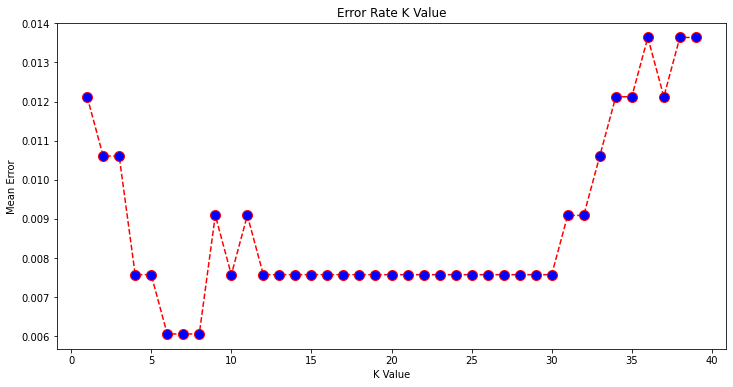

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
